# Lista 7

## Zadanie 12

In [1]:
# wczytanie danych
wino = read.table("dane_wino.txt", sep = ",")

In [2]:
# zmiana typu zmiennej z kolumny 1 na typ factor
wino$V1 = as.factor(wino$V1)
# bez zmiany zmiennej V1 na typ factor drzewa klasyfikacje klasyfikowalyby ja jako zmienna ciagla
# wyswietlenie pierwszych 6 wierszy danych
head(wino)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
2,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
3,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
4,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
5,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
6,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [3]:
# podsumowanie danych
summary(wino)

 V1           V2              V3              V4              V5       
 1:59   Min.   :11.03   Min.   :0.740   Min.   :1.360   Min.   :10.60  
 2:71   1st Qu.:12.36   1st Qu.:1.603   1st Qu.:2.210   1st Qu.:17.20  
 3:48   Median :13.05   Median :1.865   Median :2.360   Median :19.50  
        Mean   :13.00   Mean   :2.336   Mean   :2.367   Mean   :19.49  
        3rd Qu.:13.68   3rd Qu.:3.083   3rd Qu.:2.558   3rd Qu.:21.50  
        Max.   :14.83   Max.   :5.800   Max.   :3.230   Max.   :30.00  
       V6               V7              V8              V9        
 Min.   : 70.00   Min.   :0.980   Min.   :0.340   Min.   :0.1300  
 1st Qu.: 88.00   1st Qu.:1.742   1st Qu.:1.205   1st Qu.:0.2700  
 Median : 98.00   Median :2.355   Median :2.135   Median :0.3400  
 Mean   : 99.74   Mean   :2.295   Mean   :2.029   Mean   :0.3619  
 3rd Qu.:107.00   3rd Qu.:2.800   3rd Qu.:2.875   3rd Qu.:0.4375  
 Max.   :162.00   Max.   :3.880   Max.   :5.080   Max.   :0.6600  
      V10             V11  

In [4]:
# zmienna V1 jest typu factor, poniewaz podana jest dla niej tylko liczebnosc, a nie statystyki opisowe

In [5]:
# wczytanie paczki
library(rpart)

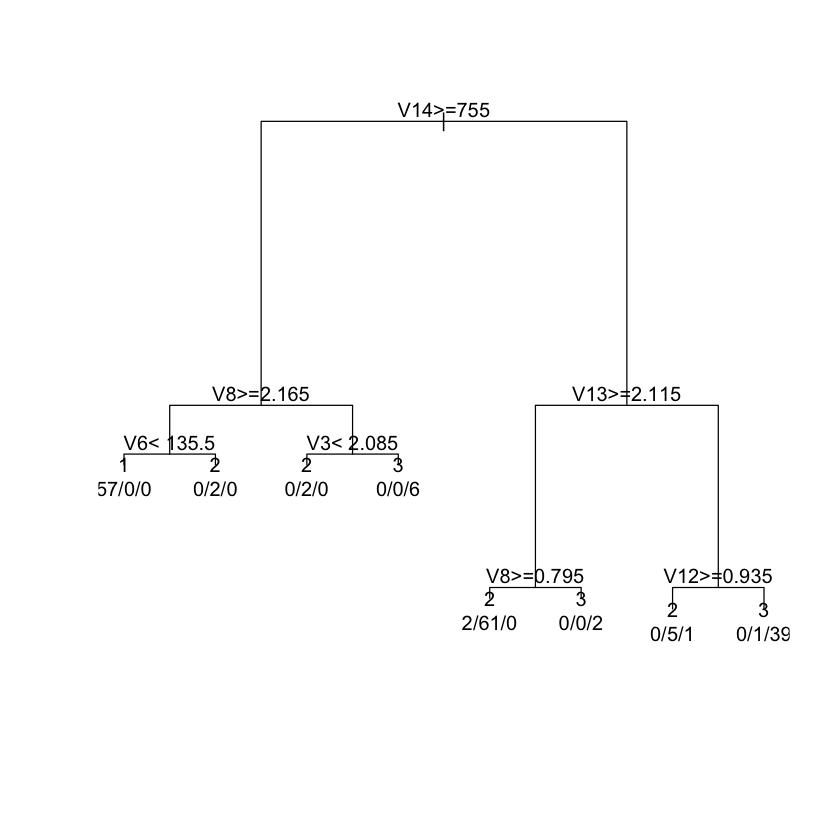

In [6]:
# stworzenie drzewa klasyfikacyjnego dla zmiennej zaleznej V1
drzewo_1 = rpart(V1 ~ ., data = wino, cp = 0.013, minsplit = 5)
# wspolczynnik zlozonosci drzewa podajemy na poczatku losowo (cp = 0.013), minimalna liczb obserwacji w lisciu wynosi 5 (minsplit = 5)
# narysowanie drzewa z okresleniem osi pionowej
plot(drzewo_1, ylim = c(0, 1))
# dodanie tekstu do drzewa
text(drzewo_1, use.n = TRUE)

In [7]:
# pierwsza zmianna klasyfikujaca jest V14 wzgledem wartosci 755, a nastepnymi zmiennymi klasyfikujacymi sa odpowiednio V8 i V13

#### I. Współczynnik złożoności, ponowne wyznaczenie drzewa.

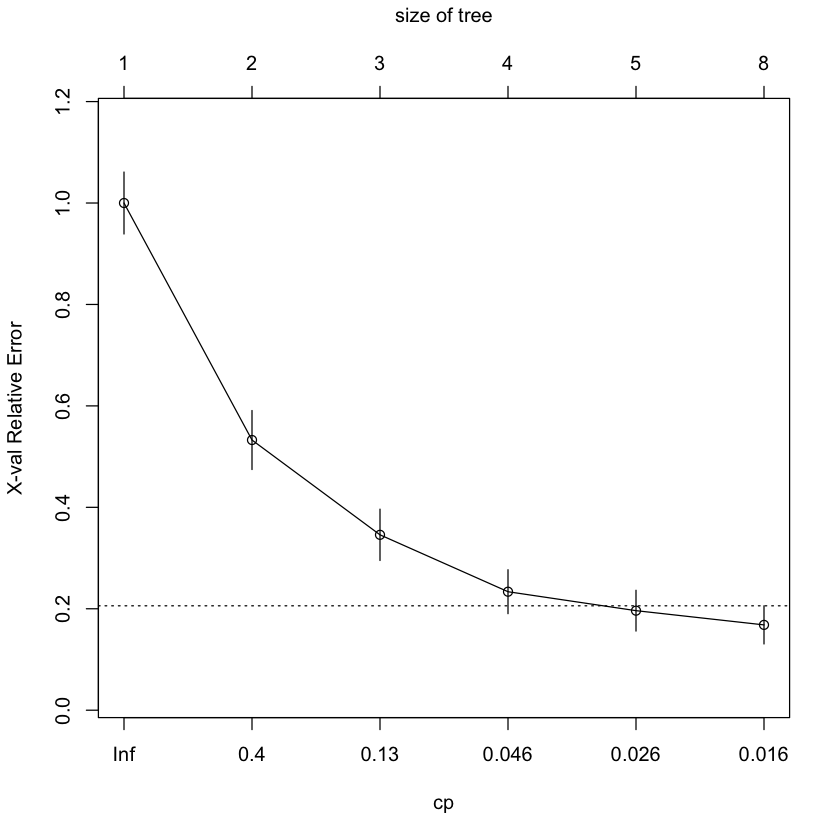

In [8]:
# wykres dla wspolczynnika zlozonosci
plotcp(drzewo_1)

In [9]:
# wspolczynnik zloznosci (cp) mozemy ustawic na wartosc 0.016
# pozioma linia ukazuje nam maksymalna wartosc bledu (zlozonosc, aby klasyfikacja byla jak najlepsza)
# w przypadku naszych danych zlozonosc jest bardzo niska
# dla normalnych danych wspolczynnik zlozonosci bedzie wiekszy - duze drzewo o duzej zloznosci latwo wtedy obcinac do mniejszej zlozonosci popelniajac wtedy maly blad, co jest niezmiernie korzystne dla czasu obliczen

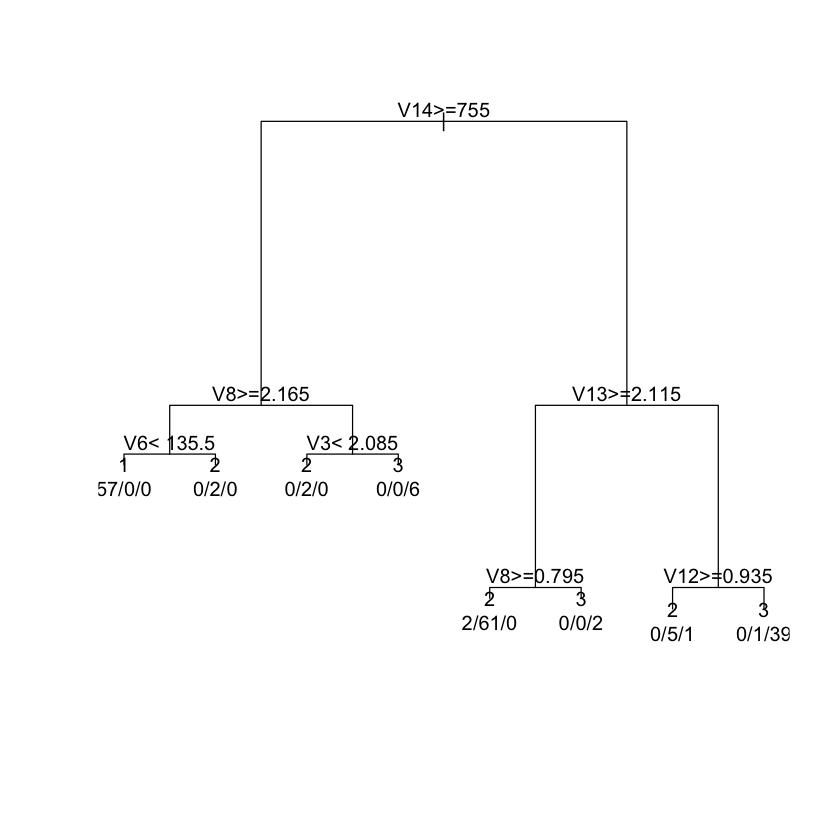

In [10]:
# obciecie stworzonego wczesniej drzewa klasyfikacyjnego do drzewa ze zmieniona wartoscia wspolczynnika zlozonosci
drzewo_2 = prune.rpart(drzewo_1, cp = 0.016)
# narysowanie drzewa z okresleniem osi pionowej
plot(drzewo_2, ylim = c(0, 1))
# dodanie tekstu do drzewa
text(drzewo_2, use.n = TRUE)

In [11]:
# jest to bardzo podobne drzewo do uprzednio stworzonego drzewa, dlatego blad predykcji pewnie bedzie porownywalny

#### II. Metoda kros-walidacji.

In [12]:
# liczba obserwacji w zbiorze danych
liczba_obserwacji = nrow(wino)
liczba_obserwacji

[1] 178

In [13]:
# stworzenie pustych wektorow do uzupelnienia
poprawnosc_kroswalidacja_1 = rep(0, liczba_obserwacji)
poprawnosc_kroswalidacja_2 = rep(0, liczba_obserwacji)
poprawnosc_kroswalidacja_3 = rep(0, liczba_obserwacji)

In [14]:
# sprawdzenie metody kros-walidacji
for (i in 1:liczba_obserwacji){
# za kazdym powtorzeniem petli bierzemy dane bez jednej obserwacji
    wino_kroswalidacja = wino[-i, ]
# okreslenie wyrzuconej obserwacji
    wino_obserwacja = wino[i, ]
# stworzenie drzewa na podstawie metody kroswalidacji
    drzewo_kroswalidacja = rpart(V1 ~ ., data = wino_kroswalidacja, cp = 0.0001, minsplit = 5)
# predykcja klasy wyrzuconej obserwacji na podstawie stworzonego drzewa
    predykcja_kroswalidacja = predict(drzewo_kroswalidacja, newdata = wino_obserwacja, type = "class")
# jezeli predykcja nie jest identyczna jak oryginalna wartosc, to do wektora wpisujemy 1
    if (predykcja_kroswalidacja != wino_obserwacja$V1){
        poprawnosc_kroswalidacja_1[i] = 1
    }
}

In [15]:
# sprawdzenie metody kros-walidacji dla innego wspolczynnika zlozonosci drzewa
for (i in 1:liczba_obserwacji){
# za kazdym powtorzeniem petli bierzemy dane bez jednej obserwacji
    wino_kroswalidacja = wino[-i, ]
# okreslenie wyrzuconej obserwacji
    wino_obserwacja = wino[i, ]
# stworzenie drzewa na podstawie metody kroswalidacji z innym wspolczynnikiem zlozonosci drzewa
    drzewo_kroswalidacja = rpart(V1 ~ ., data = wino_kroswalidacja, cp = 0.005, minsplit = 5)
# predykcja klasy wyrzuconej obserwacji na podstawie stworzonego drzewa
    predykcja_kroswalidacja = predict(drzewo_kroswalidacja, newdata = wino_obserwacja, type = "class")
# jezeli predykcja nie jest identyczna jak oryginalna wartosc, to do wektora wpisujemy 1
    if (predykcja_kroswalidacja != wino_obserwacja$V1){
        poprawnosc_kroswalidacja_2[i] = 1
    }
}

In [16]:
# sprawdzenie metody kros-walidacji dla innego wspolczynnika zlozonosci drzewa
for (i in 1:liczba_obserwacji){
# za kazdym powtorzeniem petli bierzemy dane bez jednej obserwacji
    wino_kroswalidacja = wino[-i, ]
# okreslenie wyrzuconej obserwacji
    wino_obserwacja = wino[i, ]
# stworzenie drzewa na podstawie metody kroswalidacji z innym wspolczynnikiem zlozonosci drzewa
    drzewo_kroswalidacja = rpart(V1 ~ ., data = wino_kroswalidacja, cp = 0.013, minsplit = 5)
# predykcja klasy wyrzuconej obserwacji na podstawie stworzonego drzewa
    predykcja_kroswalidacja = predict(drzewo_kroswalidacja, newdata = wino_obserwacja, type = "class")
# jezeli predykcja nie jest identyczna jak oryginalna wartosc, to do wektora wpisujemy 1
    if (predykcja_kroswalidacja != wino_obserwacja$V1){
        poprawnosc_kroswalidacja_3[i] = 1
    }
}

In [17]:
# wypisanie utworzonych wektorow
poprawnosc_kroswalidacja_1
poprawnosc_kroswalidacja_2
poprawnosc_kroswalidacja_3

[1] 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0
 [38] 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1
 [75] 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[112] 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0
[149] 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

[1] 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0
 [38] 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1
 [75] 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[112] 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0
[149] 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

[1] 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0
 [38] 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1
 [75] 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[112] 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0
[149] 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

#### III. Szacowanie błędów klasyfikacji.

In [18]:
# predykcje klas na podstawie drzew
predykcja_drzewo_1 = predict(drzewo_1, type = "class")
predykcja_drzewo_2 = predict(drzewo_2, type = "class")
predykcja_drzewo_1
predykcja_drzewo_2

1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  1   1   1   1   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  1   1   1   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  2   2   2   3   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2 
101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 
  2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2 
121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 
  2   2   2   2   2   2   2   2   2   2   3   3   3   3   3   3   3   3   3   3 
141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 
  3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3 
161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 
  3   2   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3 
Levels: 1 2 3

1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  1   1   1   1   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  1   1   1   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  2   2   2   3   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2 
101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 
  2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2 
121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 
  2   2   2   2   2   2   2   2   2   2   3   3   3   3   3   3   3   3   3   3 
141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 
  3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3 
161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 
  3   2   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3 
Levels: 1 2 3

In [19]:
# tabele predykcji dla drzew
tabela_predykcji_drzewo_1 = table(True = wino$V1, Predicted = predykcja_drzewo_1)
tabela_predykcji_drzewo_2 = table(True = wino$V1, Predicted = predykcja_drzewo_2)
tabela_predykcji_drzewo_1
tabela_predykcji_drzewo_2

    Predicted
True  1  2  3
   1 57  2  0
   2  0 70  1
   3  0  1 47

    Predicted
True  1  2  3
   1 57  2  0
   2  0 70  1
   3  0  1 47

In [20]:
# tabele predykcji dla obu drzew sa identyczne

In [21]:
# bledy predykcji dla drzew
blad_predykcji_drzewo_1 = (1 - (sum(diag(tabela_predykcji_drzewo_1))) / nrow(wino)) * 100
blad_predykcji_drzewo_2 = (1 - (sum(diag(tabela_predykcji_drzewo_1))) / nrow(wino)) * 100
blad_predykcji_drzewo_1
blad_predykcji_drzewo_2

[1] 2.247191

[1] 2.247191

In [22]:
# bledy predykcji dla obu drzew sa identyczne i maja niska wartosc

In [23]:
# poprawne predykcje dla drzew
poprawna_predykcja_drzewo_1 = 100 - blad_predykcji_drzewo_1
poprawna_predykcja_drzewo_1 = 100 - blad_predykcji_drzewo_2
poprawna_predykcja_drzewo_1
poprawna_predykcja_drzewo_1

[1] 97.75281

[1] 97.75281

In [24]:
# bledy predykcji dla drzew opartych o metode kros-walidacji
blad_predykcji_drzewo_kroswalidacja_1 = sum(poprawnosc_kroswalidacja_1) / liczba_obserwacji * 100
blad_predykcji_drzewo_kroswalidacja_2 = sum(poprawnosc_kroswalidacja_2) / liczba_obserwacji * 100
blad_predykcji_drzewo_kroswalidacja_3 = sum(poprawnosc_kroswalidacja_3) / liczba_obserwacji * 100
blad_predykcji_drzewo_kroswalidacja_1
blad_predykcji_drzewo_kroswalidacja_2
blad_predykcji_drzewo_kroswalidacja_3

[1] 11.79775

[1] 11.79775

[1] 12.35955

In [25]:
# bledy predykcji dla obu drzew z wartoscia wspolczynnikow zlozonosci 0.0001 oraz 0.005 sa identyczne, nizsze niz dla drzewa ze wspolczynnikiem zlozonosci 0.013
# bledy predykcji dla metody kros-walidacji maja wyzsza wartosc niz dla standardowych drzew

In [26]:
# poprawne predykcje dla drzew opartych o metode kros-walidacji
poprawna_predykcja_drzewo_kroswalidacja_1 = 100 - blad_predykcji_drzewo_kroswalidacja_1
poprawna_predykcja_drzewo_kroswalidacja_2 = 100 - blad_predykcji_drzewo_kroswalidacja_2
poprawna_predykcja_drzewo_kroswalidacja_3 = 100 - blad_predykcji_drzewo_kroswalidacja_3
poprawna_predykcja_drzewo_kroswalidacja_1
poprawna_predykcja_drzewo_kroswalidacja_2
poprawna_predykcja_drzewo_kroswalidacja_3

[1] 88.20225

[1] 88.20225

[1] 87.64045

In [27]:
# widzimy, ze walidacja nie zawsze jest potrzebna (wyrzucenie jednej obserwacji przeklada sie na wieksza liczbe bledow)
# mozemy wnioskowac, ze prawdopodobienstwa przynaleznosci do klas sa do siebie bardzo zblizone

#### IV. Wybranie lepszego drzewa.

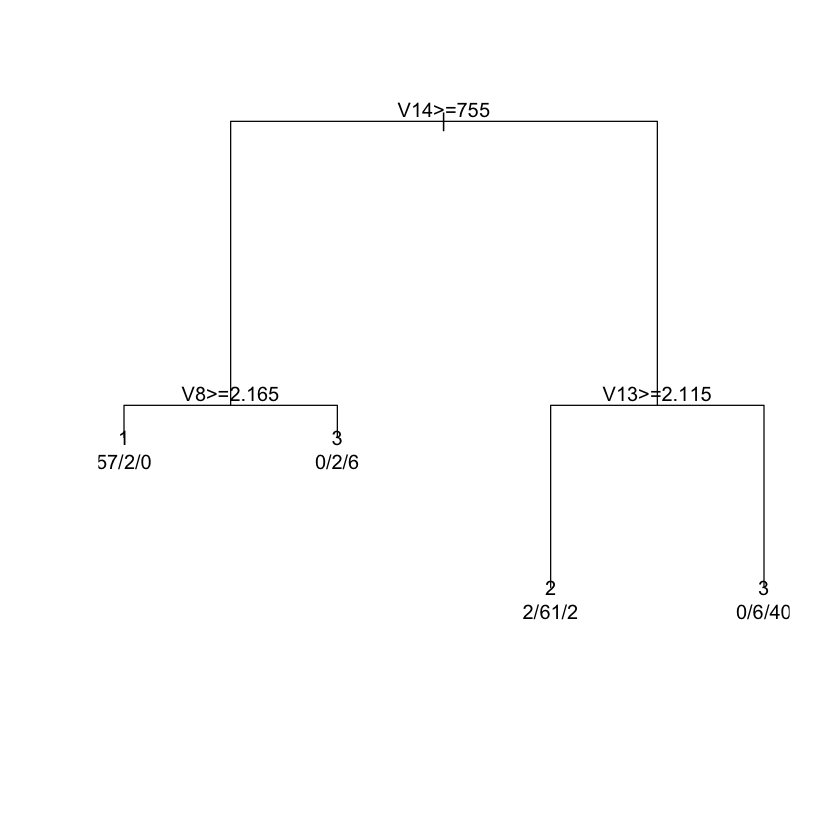

In [28]:
# obciecie stworzonego wczesniej drzewa klasyfikacyjnego do drzewa ze zmieniona wartoscia wspolczynnika zlozonosci
drzewo_3 = prune.rpart(drzewo_1, cp = 0.05)
# narysowanie drzewa z okresleniem osi pionowej
plot(drzewo_3, ylim = c(0, 1))
# dodanie tekstu do drzewa
text(drzewo_3, use.n = TRUE)

In [29]:
# predykcja klas na podstawie drzewa
predykcja_drzewo_3 = predict(drzewo_3, type = "class")
predykcja_drzewo_3

[1] 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 2 2 2 2 2 2 3 2 3 2 2 1
 [75] 3 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 3 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 2 2 3 3 3 3 3 3 3
[149] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
Levels: 1 2 3

In [30]:
# tabela predykcji dla drzewa
tabela_predykcji_drzewo_3 = table(True = wino$V1, Predicted = predykcja_drzewo_3)
tabela_predykcji_drzewo_3

    Predicted
True  1  2  3
   1 57  2  0
   2  2 61  8
   3  0  2 46

In [31]:
# bledy predykcji dla drzewa
blad_predykcji_drzewo_3 = (1 - (sum(diag(tabela_predykcji_drzewo_3))) / nrow(wino)) * 100
blad_predykcji_drzewo_3

[1] 7.865169

In [32]:
# poprawna predykcja dla drzewa
poprawna_predykcja_drzewo_3 = 100 - blad_predykcji_drzewo_3
poprawna_predykcja_drzewo_3

[1] 92.13483

In [33]:
# blad predykcji dla drzewa ze wspolczynnikiem zlozonosci wynoszacym 0.005 jest lepszy dla metody bez kros-walidacji
# najlepsze (najnizsze) bledy predykcji obserwujemy dla drzew z nizszymi wartosciami wspolczynnikow zlozonosci (0.013 lub 0.016)